In [14]:
#
# 6G7Z1003 portfolio assignment
# python implementation of ACO tour construction using I-Roulette 
#
import numpy as np
import random
import time
import multiprocessing as mp

def check_tour( tour, n ):
    # sanity check a tour to make sure it has each city represented once
    m = len(tour)
    if m != n:
        return False
    counts = [0 for i in range(n)]
    for city in tour:
        if city < 0 or city > n-1 or counts[city] != 0:
            return False
        counts[city] += 1
    return True

def check_tours( tours, n ):
    # check all tours in a list
    all_valid = True
    for t in tours:
        if not check_tour(t, n):
            all_valid = False
            break
    return all_valid

def iroulette( weights ):
    # Independent roulette - multiply weights by random numbers and return index of highest product
    num_weights = len(weights)
    imax = -1;
    vmax = 0
    for i in range(num_weights):
        val = weights[i]* random.random()
        if val > vmax:
            vmax = val
            imax = i
    return imax
    
def construct_tour( weights ):
    # plain python version - construct a tour using the iroulette function
    n = weights[0].size
    
    # random start city
    cur_city = random.randrange(0,n)
    
    tour = [cur_city]
    # free[i] is true if city i has not been visited 
    free = np.zeros(n) == 0.0
    free[cur_city] = False
    

    while len(tour) < n:
        w = []
        indices = []
        for i in range(n):
            if free[i]:
                w.append( weights[cur_city][i] )
                indices.append(i)
        sel = iroulette(w) #selected weight
        cur_city = indices[sel] #selected city
        tour.append(cur_city)
        free[cur_city] = False
    return tour

def construct_tours( weights, num_ants ):
    # construct num_ants tours, and return in a list
    tours = []
    for i in range(num_ants):
        tours.append( construct_tour(weights))
    return tours

def np_construct_tour( weights ):
    # todo: make this construct a tour from the weights, using a vectorized version of I-Roulette
    n = weights[0].size
    cur_city = random.randrange(0,n)
    tour=[cur_city]
    free=np.zeros(n) == 0.0
    free[cur_city] = False
    
    while len(tour)<n:
        #gets list of free cities
        indices=np.nonzero(free)[0]
        #multiply weights of the free citites by a random number
        val=weights[cur_city][free]*random.random()
        #return the index of the city with the highest product from val
        h= np.argmax(val)
        #use boolean indexing to get the current city from the list of non visited citities
        cur_city=indices[h]
        
        tour.append(cur_city)
        free[cur_city]=False
    return tour # placeholder - empty tour

def construct_tours_np( weights, num_ants ):
    # construct num_ants tours using the numpy vesion of the tour construction function, and return in a list
    tours = []
    for i in range(num_ants):
        tours.append( np_construct_tour(weights) )
    return tours

def construct_tour_mp( weights, queue ):
    result = np_construct_tour(weights)
    queue.put(result) 
def construct_tours_mp( weights, num_ants ):
    # todo: use multiprocessing to construct tours in parallel (using np_construct_tour) 
    num_procs = num_ants
    out_queue = mp.Queue()
    # create some processes
    procs = [mp.Process(target=construct_tour_mp,args=(weights, out_queue)) for p in range(num_procs)]
    for p in procs:
        p.start()
    
    out_vals = [out_queue.get() for p in procs]
    return out_vals# placeholder - replace this
   

def main():
    n = 100 # number of cities in the problem
    weights = np.random.random((n,n)) # square matrix of random weights for edges
    num_ants = 4

    # run the plain python version
    t = time.perf_counter()
    tours = construct_tours( weights, num_ants)
    t = time.perf_counter() - t
    print("constructed",len(tours),"tours")
    print("valid tours:",check_tours(tours, n))
    print("Serial: time for",num_ants,"ants is",t)
    print()

    # run the numpy version - you need to implement this
    t = time.perf_counter()
    tours = construct_tours_np( weights, num_ants )
    t = time.perf_counter() - t
    print("constructed",len(tours),"tours")
    print("valid tours:",check_tours(tours, n))
    print("Numpy: time for",num_ants,"ants is",t)
    print()

    # run the multiprocessing version - you need to implement this
    t = time.perf_counter()
    tours = construct_tours_mp( weights, num_ants )
    t = time.perf_counter() - t
    print("constructed",len(tours),"tours")
    print("valid tours:",check_tours(tours, n))
    print("Multiprocessing: time for",num_ants,"ants is",t)

if __name__ == '__main__':
    main()



constructed 4 tours
valid tours: True
Serial: time for 4 ants is 0.02755286102183163

constructed 4 tours
valid tours: True
Numpy: time for 4 ants is 0.008004960953257978

constructed 4 tours
valid tours: True
Multiprocessing: time for 4 ants is 0.04170795902609825


In [9]:
from matplotlib import pyplot as plt

In [85]:
## Time for 1000 citites ##

0.03149435995146632
0.005342900985851884
0.04611179092898965


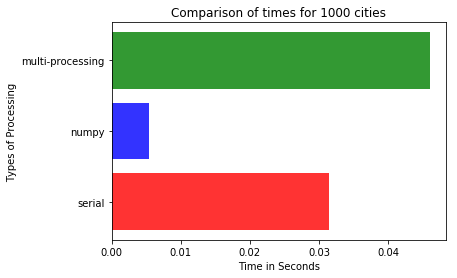

In [83]:
def main():
    n = 1000 # number of cities in the problem
    weights = np.random.random((n,n)) # square matrix of random weights for edges
    num_ants = 8

    # run the plain python version
    st = time.perf_counter()
    tours = construct_tours( weights, num_ants)
    st = time.perf_counter() - st
    print(st)
    

    # run the numpy version - you need to implement this
    nt = time.perf_counter()
    tours = construct_tours_np( weights, num_ants )
    nt = time.perf_counter() - nt
    print(nt)
   

    # run the multiprocessing version - you need to implement this
    mt = time.perf_counter()
    tours = construct_tours_mp( weights, num_ants )
    mt = time.perf_counter() - mt
    print(mt)
    
    times = [st, nt, mt]
    names = ('serial', 'numpy', 'multi-processing')
    y_pos = np.arange(len(names))
 
    # Create horizontal bars
    plt.barh(y_pos, times,align='center', alpha=0.8,color=['r','b','g'])
    plt.yticks(y_pos, names) 
    plt.xlabel('Time in Seconds')
    plt.ylabel('Types of Processing')
    plt.title('Comparison of times for 1000 cities')
    # Show graphic
    plt.show()

if __name__ == '__main__':
    main()


In [86]:
# Time for 2000 cities #

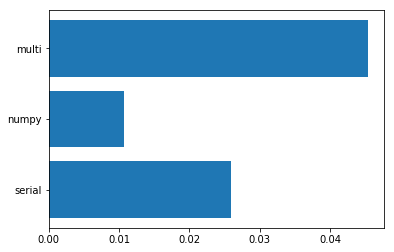

In [71]:
def main():
    n = 2000 # number of cities in the problem
    weights = np.random.random((n,n)) # square matrix of random weights for edges
    num_ants = 8

    # run the plain python version
    st = time.perf_counter()
    tours = construct_tours( weights, num_ants)
    st = time.perf_counter() - st
    print(st)
    

    # run the numpy version - you need to implement this
    nt = time.perf_counter()
    tours = construct_tours_np( weights, num_ants )
    nt = time.perf_counter() - nt
    print(nt)
   

    # run the multiprocessing version - you need to implement this
    mt = time.perf_counter()
    tours = construct_tours_mp( weights, num_ants )
    mt = time.perf_counter() - mt
    print(mt)
    
    times = [st, nt, mt]
    names = ('serial', 'numpy', 'multi-processing')
    y_pos = np.arange(len(names))
 
    # Create horizontal bars
    plt.barh(y_pos, times,align='center', alpha=0.8,color=['r','b','g'])
    plt.yticks(y_pos, names) 
    plt.xlabel('Time in Seconds')
    plt.ylabel('Types of Processing')
    plt.title('Comparison of times for 2000 cities')
    # Show graphic
    plt.show()

if __name__ == '__main__':
    main()

In [87]:
# Time for 4000 cities #


In [28]:
def main():
    n = 4000 # number of cities in the problem
    weights = np.random.random((n,n)) # square matrix of random weights for edges
    num_ants = 8

    # run the plain python version
    st = time.perf_counter()
    tours = construct_tours( weights, num_ants)
    st = time.perf_counter() - st
    print(st)
    

    # run the numpy version - you need to implement this
    nt = time.perf_counter()
    tours = construct_tours_np( weights, num_ants )
    nt = time.perf_counter() - nt
    print(nt)
   

    # run the multiprocessing version - you need to implement this
    mt = time.perf_counter()
    tours = construct_tours_mp( weights, num_ants )
    mt = time.perf_counter() - mt
    print(mt)
    
    times = [st, nt, mt]
    names = ('serial', 'numpy', 'multi-processing')
    y_pos = np.arange(len(names))
 
    # Create horizontal bars
    plt.barh(y_pos, times,align='center', alpha=0.8,color=['r','b','g'])
    plt.yticks(y_pos, names) 
    plt.xlabel('Time in Seconds')
    plt.ylabel('Types of Processing')
    plt.title('Comparison of times for 4000 cities')
    # Show graphic
    plt.show()

if __name__ == '__main__':
    main()

In [88]:
# Time for 8000 cities #

In [ ]:
def main():
    n = 8000 # number of cities in the problem
    weights = np.random.random((n,n)) # square matrix of random weights for edges
    num_ants = 8

    # run the plain python version
    st = time.perf_counter()
    tours = construct_tours( weights, num_ants)
    st = time.perf_counter() - st
    print(st)
    

    # run the numpy version - you need to implement this
    nt = time.perf_counter()
    tours = construct_tours_np( weights, num_ants )
    nt = time.perf_counter() - nt
    print(nt)
   

    # run the multiprocessing version - you need to implement this
    mt = time.perf_counter()
    tours = construct_tours_mp( weights, num_ants )
    mt = time.perf_counter() - mt
    print(mt)
    
    times = [st, nt, mt]
    names = ('serial', 'numpy', 'multi-processing')
    y_pos = np.arange(len(names))
 
    # Create horizontal bars
    plt.barh(y_pos, times,align='center', alpha=0.8,color=['r','b','g'])
    plt.yticks(y_pos, names) 
    plt.xlabel('Time in Seconds')
    plt.ylabel('Types of Processing')
    plt.title('Comparison of times for 8000 cities')
    # Show graphic
    plt.show()

if __name__ == '__main__':
    main()

In [89]:
# Time for 4 ants#

In [ ]:
def main():
    n = 1000 # number of cities in the problem
    weights = np.random.random((n,n)) # square matrix of random weights for edges
    num_ants = 4

    # run the plain python version
    st = time.perf_counter()
    tours = construct_tours( weights, num_ants)
    st = time.perf_counter() - st
    print(st)
    

    # run the numpy version - you need to implement this
    nt = time.perf_counter()
    tours = construct_tours_np( weights, num_ants )
    nt = time.perf_counter() - nt
    print(nt)
   

    # run the multiprocessing version - you need to implement this
    mt = time.perf_counter()
    tours = construct_tours_mp( weights, num_ants )
    mt = time.perf_counter() - mt
    print(mt)
    
    times = [st, nt, mt]
    names = ('serial', 'numpy', 'multi-processing')
    y_pos = np.arange(len(names))
 
    # Create horizontal bars
    plt.barh(y_pos, times,align='center', alpha=0.8,color=['r','b','g'])
    plt.yticks(y_pos, names) 
    plt.xlabel('Time in Seconds')
    plt.ylabel('Types of Processing')
    plt.title('Comparison of times for 2000 cities')
    # Show graphic
    plt.show()

if __name__ == '__main__':
    main()

In [90]:
# time for 10 ants#

In [ ]:
def main():
    n = 1000 # number of cities in the problem
    weights = np.random.random((n,n)) # square matrix of random weights for edges
    num_ants = 10

    # run the plain python version
    st = time.perf_counter()
    tours = construct_tours( weights, num_ants)
    st = time.perf_counter() - st
    print(st)
    

    # run the numpy version - you need to implement this
    nt = time.perf_counter()
    tours = construct_tours_np( weights, num_ants )
    nt = time.perf_counter() - nt
    print(nt)
   

    # run the multiprocessing version - you need to implement this
    mt = time.perf_counter()
    tours = construct_tours_mp( weights, num_ants )
    mt = time.perf_counter() - mt
    print(mt)
    
    times = [st, nt, mt]
    names = ('serial', 'numpy', 'multi-processing')
    y_pos = np.arange(len(names))
 
    # Create horizontal bars
    plt.barh(y_pos, times,align='center', alpha=0.8,color=['r','b','g'])
    plt.yticks(y_pos, names) 
    plt.xlabel('Time in Seconds')
    plt.ylabel('Types of Processing')
    plt.title('Comparison of times for 2000 cities')
    # Show graphic
    plt.show()

if __name__ == '__main__':
    main()

In [92]:
import platform

def print_sysinfo():

    print('\nPython version  :', platform.python_version())
    print('compiler        :', platform.python_compiler())

    print('\nsystem     :', platform.system())
    print('release    :', platform.release())
    print('machine    :', platform.machine())
    print('processor  :', platform.processor())
    print('CPU count  :', mp.cpu_count())
    print('interpreter:', platform.architecture()[0])
    print('\n\n')
print_sysinfo()


Python version  : 3.6.5
compiler        : GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)

system     : Darwin
release    : 18.0.0
machine    : x86_64
processor  : i386
CPU count  : 4
interpreter: 64bit



